In [1]:
import pandas as pd
import glob
import numpy as np

In [2]:
#ファイル読み込み
df = pd.DataFrame()
for i in glob.glob("train/*.csv*"):
    tmp_df=pd.read_csv(i)
    df = pd.concat([df, tmp_df],ignore_index=True)

C:\Users\osako\AppData\Local\Temp\ipykernel_10164\132664144.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df=pd.read_csv(i)
C:\Users\osako\AppData\Local\Temp\ipykernel_10164\132664144.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df=pd.read_csv(i)
C:\Users\osako\AppData\Local\Temp\ipykernel_10164\132664144.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df=pd.read_csv(i)
C:\Users\osako\AppData\Local\Temp\ipykernel_10164\132664144.py:4: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  tmp_df=pd.read_csv(i)


In [3]:
df.head(1)

,ID,種類,地域,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,...,前面道路：方位,前面道路：種類,前面道路：幅員（ｍ）,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
0,1004555,中古マンション等,NaN,1101,北海道,札幌市中央区,南２条西,西１８丁目,5,３ＬＤＫ,...,NaN,NaN,NaN,近隣商業地域,80.0,300.0,2009年第2四半期,改装済,NaN,6.982271


In [4]:
#欠損値確認,欠損値削除
df_rownum=df.shape[0]
df_null_column=df.columns[df.isnull().sum()==df_rownum]
df=df.drop(df_null_column,axis=1)

In [5]:
#欠損値の多い列を削除
df=df.drop(['今後の利用目的','取引の事情等'],axis=1)

In [6]:
#各列のユニークな値を抽出
unique_value=df.apply(pd.Series.unique)
print(unique_value['都道府県名'])

['北海道' '青森県' '岩手県' '宮城県' '秋田県' '山形県' '福島県' '茨城県' '栃木県' '群馬県' '埼玉県' '千葉県'
 '東京都' '神奈川県' '新潟県' '富山県' '石川県' '福井県' '山梨県' '長野県' '岐阜県' '静岡県' '愛知県' '三重県'
 '滋賀県' '京都府' '大阪府' '兵庫県' '奈良県' '和歌山県' '鳥取県' '島根県' '岡山県' '広島県' '山口県' '徳島県'
 '香川県' '愛媛県' '高知県' '福岡県' '佐賀県' '長崎県' '熊本県' '大分県' '宮崎県' '鹿児島県' '沖縄県']


In [7]:
unique_value['建築年']

array(['昭和61年', '平成7年', '平成11年', '平成8年', '平成2年', '昭和50年', '平成4年', '平成21年',
       '昭和57年', '昭和54年', '平成25年', '昭和49年', nan, '昭和55年', '平成14年', '平成3年',
       '昭和60年', '平成6年', '平成13年', '昭和51年', '平成16年', '昭和63年', '平成28年',
       '昭和56年', '昭和62年', '平成9年', '昭和45年', '昭和53年', '平成17年', '平成20年',
       '平成5年', '平成15年', '平成10年', '令和3年', '平成22年', '昭和59年', '昭和52年',
       '平成19年', '平成18年', '昭和48年', '昭和64年', '平成12年', '昭和39年', '平成23年',
       '昭和46年', '平成26年', '昭和58年', '昭和47年', '平成24年', '戦前', '平成27年',
       '平成31年', '平成29年', '令和2年', '平成30年', '令和4年', '昭和44年', '昭和43年',
       '昭和42年', '昭和41年', '昭和40年', '昭和22年', '昭和21年', '昭和27年', '昭和38年',
       '昭和35年', '昭和28年', '昭和31年', '昭和37年', '昭和34年', '昭和33年', '昭和36年',
       '昭和25年', '昭和24年', '昭和29年', '昭和30年', '昭和26年', '昭和32年', '昭和23年'],
      dtype=object)

In [8]:
df=df.drop(['種類'],axis=1)

In [9]:
df_edit1=df.copy()

In [10]:
df_edit1

,ID,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log
0,1004555,1101,北海道,札幌市中央区,南２条西,西１８丁目,5,３ＬＤＫ,70,昭和61年,ＳＲＣ,住宅,近隣商業地域,80.0,300.0,2009年第2四半期,改装済,6.982271
1,1051274,1106,北海道,札幌市南区,川沿１７条,真駒内,30分?60分,４ＬＤＫ,90,平成7年,ＲＣ,住宅,第１種住居地域,60.0,200.0,2014年第3四半期,改装済,6.968483
2,1008483,1101,北海道,札幌市中央区,南１４条西,西１８丁目,29,４ＬＤＫ,95,平成11年,ＲＣ,住宅,近隣商業地域,80.0,300.0,2013年第3四半期,改装済,7.361728
3,1075401,1110,北海道,札幌市清田区,清田２条,福住,30分?60分,４ＬＤＫ,80,平成8年,ＲＣ,住宅,第１種住居地域,60.0,200.0,2013年第2四半期,未改装,6.991226
4,1090633,1110,北海道,札幌市清田区,清田１条,福住,30分?60分,１ＬＤＫ,35,平成2年,ＲＣ,住宅,近隣商業地域,80.0,200.0,2008年第4四半期,未改装,6.579784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765407,47013766,47201,沖縄県,那覇市,楚辺,県庁前(沖縄),NaN,３ＬＤＫ,60,平成3年,ＲＣ,住宅,NaN,NaN,NaN,2010年第2四半期,未改装,7.000000
765408,47023993,47211,沖縄県,沖縄市,比屋根,NaN,NaN,３ＬＤＫ,65,平成14年,ＲＣ,住宅,近隣商業地域,80.0,300.0,2015年第2四半期,未改装,7.230449
765409,47003366,47208,沖縄県,浦添市,城間,NaN,NaN,２ＬＤＫ,70,平成26年,ＲＣ,住宅,第１種中高層住居専用地域,60.0,200.0,2017年第2四半期,未改装,7.462398
765410,47003668,47208,沖縄県,浦添市,港川,NaN,NaN,４ＬＤＫ,90,平成17年,ＲＣ,NaN,商業地域,80.0,400.0,2018年第1四半期,改装済,7.397940


In [11]:
df_edit1.dropna(inplace=True)

In [12]:
df_edit1.loc[df_edit1['建築年']=='戦前','建築年']='昭和20年'

In [13]:
df_edit1['和暦名称']=df_edit1['建築年'].str[:2]

In [14]:
df_edit1['和暦年']=df_edit1['建築年'].str[2:-1]

In [15]:
df_edit1['西暦']=0

In [16]:
df_edit1['和暦年'].unique()

array(['61', '7', '11', '8', '2', '50', '21', '57', '49', '55', '4', '14',
       '3', '6', '13', '51', '60', '16', '63', '28', '62', '9', '53',
       '25', '17', '5', '15', '10', '54', '22', '59', '20', '19', '18',
       '48', '64', '12', '39', '45', '56', '23', '46', '58', '47', '52',
       '24', '27', '26', '31', '29', '44', '30', '43', '42', '41', '40',
       '38', '35', '37', '34', '33', '36', '32'], dtype=object)

In [17]:
df_edit1['和暦年']=df_edit1['和暦年'].astype(int)

In [18]:
df_edit1

,ID,市区町村コード,都道府県名,市区町村名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,...,用途,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引価格（総額）_log,和暦名称,和暦年,西暦
0,1004555,1101,北海道,札幌市中央区,南２条西,西１８丁目,5,３ＬＤＫ,70,昭和61年,...,住宅,近隣商業地域,80.0,300.0,2009年第2四半期,改装済,6.982271,昭和,61,0
1,1051274,1106,北海道,札幌市南区,川沿１７条,真駒内,30分?60分,４ＬＤＫ,90,平成7年,...,住宅,第１種住居地域,60.0,200.0,2014年第3四半期,改装済,6.968483,平成,7,0
2,1008483,1101,北海道,札幌市中央区,南１４条西,西１８丁目,29,４ＬＤＫ,95,平成11年,...,住宅,近隣商業地域,80.0,300.0,2013年第3四半期,改装済,7.361728,平成,11,0
3,1075401,1110,北海道,札幌市清田区,清田２条,福住,30分?60分,４ＬＤＫ,80,平成8年,...,住宅,第１種住居地域,60.0,200.0,2013年第2四半期,未改装,6.991226,平成,8,0
4,1090633,1110,北海道,札幌市清田区,清田１条,福住,30分?60分,１ＬＤＫ,35,平成2年,...,住宅,近隣商業地域,80.0,200.0,2008年第4四半期,未改装,6.579784,平成,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
765399,47001295,47201,沖縄県,那覇市,東町,旭橋,5,２ＬＤＫ,65,平成24年,...,住宅,商業地域,80.0,400.0,2019年第4四半期,未改装,7.591065,平成,24,0
765400,47023706,47201,沖縄県,那覇市,字大道,安里,6,２ＬＤＫ,60,平成6年,...,住宅,第１種住居地域,60.0,200.0,2016年第3四半期,改装済,7.255273,平成,6,0
765403,47001734,47201,沖縄県,那覇市,銘苅,古島,16,２ＬＤＫ,60,平成15年,...,住宅,第２種中高層住居専用地域,60.0,200.0,2019年第2四半期,未改装,7.462398,平成,15,0
765404,47029618,47201,沖縄県,那覇市,小禄,小禄,24,３ＬＤＫ,70,平成19年,...,住宅,第１種中高層住居専用地域,60.0,200.0,2013年第2四半期,未改装,7.397940,平成,19,0


In [19]:
df_edit1.loc[df_edit1['和暦名称']=='昭和','西暦']+=1925
df_edit1.loc[df_edit1['和暦名称']=='平成','西暦']+=1988
df_edit1.loc[df_edit1['和暦名称']=='令和','西暦']+=2018

In [20]:
df_edit1.drop(['和暦名称','和暦年','建築年'],inplace=True,axis=1)

In [21]:
df_edit1.loc[df_edit1['最寄駅：距離（分）']=='30分?60分','最寄駅：距離（分）']=45
df_edit1.loc[df_edit1['最寄駅：距離（分）']=='1H?1H30','最寄駅：距離（分）']=75
df_edit1.loc[df_edit1['最寄駅：距離（分）']=='1H30?2H','最寄駅：距離（分）']=105
df_edit1.loc[df_edit1['最寄駅：距離（分）']=='2H?','最寄駅：距離（分）']=120

In [22]:
df_edit1['取引時点年数']=df_edit1['取引時点'].str[:4]
df_edit1['四半期']=df_edit1['取引時点'].str[5:]

In [23]:
df_edit1.loc[df_edit1['四半期']=='第2四半期','取引時点年数']+='.25'
df_edit1.loc[df_edit1['四半期']=='第3四半期','取引時点年数']+='.5'
df_edit1.loc[df_edit1['四半期']=='第4四半期','取引時点年数']+='.75'

In [24]:
df_edit1.drop(['取引時点','四半期'],inplace=True,axis=1)

In [25]:
df_edit1.drop(['ID',
#                '地区名',
#                '最寄駅：名称',
               '市区町村コード',
#                '用途',
#                '市区町村名',
#                '間取り',
#                '建物の構造',
#                '都市計画'
              ],
               inplace=True,axis=1)

In [26]:
df_edit1.loc[df_edit1['面積（㎡）']=='2000㎡以上','面積（㎡）']='2000'

In [27]:
df_edit1['最寄駅：距離（分）']=df_edit1['最寄駅：距離（分）'].astype(int)
df_edit1['面積（㎡）']=df_edit1['面積（㎡）'].astype(int)
df_edit1['西暦']=df_edit1['西暦'].astype(int)
df_edit1['取引時点年数']=df_edit1['取引時点年数'].astype('float16')
df_edit1['容積率（％）']=df_edit1['容積率（％）'].astype('float16')
df_edit1['建ぺい率（％）']=df_edit1['建ぺい率（％）'].astype('float16')
df_edit1['取引価格（総額）_log']=df_edit1['取引価格（総額）_log'].astype('float')

In [28]:
df_edit1.dtypes

都道府県名            object
市区町村名            object
地区名              object
最寄駅：名称           object
最寄駅：距離（分）         int32
間取り              object
面積（㎡）             int32
建物の構造            object
用途               object
都市計画             object
建ぺい率（％）         float16
容積率（％）          float16
改装               object
取引価格（総額）_log    float64
西暦                int32
取引時点年数          float16
dtype: object

In [29]:
df_test=df_edit1['取引価格（総額）_log']
df_edit1.drop('取引価格（総額）_log',inplace=True,axis=1)

In [117]:
df_dummy=pd.get_dummies(df_edit1[[
#     '市区町村コード',
    '都道府県名',
    '市区町村名',
    '最寄駅：名称',
     '間取り',
     '建物の構造',
#     '用途',
    '都市計画',
    '改装']],drop_first=True)
df_dummy = pd.concat([df_edit1, df_dummy], axis=1)
df_dummy.drop(['都道府県名', 
               '市区町村名',
               '間取り',
                '建物の構造',
                '都市計画',
               '改装'],axis=1,inplace=True)

KeyboardInterrupt: 

In [31]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

labels = df_edit1[[
#     '市区町村コード',
    '都道府県名',
    '市区町村名',
    '最寄駅：名称',
     '間取り',
     '建物の構造',
    '地区名',
     '用途',
    '都市計画',
    '改装']].values
labels_id = oe.fit_transform(labels)
# df_dummy = pd.concat([df_edit1, labels_id], axis=1)
# df_dummy.drop(['都道府県名', 
#                '市区町村名',
#                '間取り',
#                 '建物の構造',
#                 '都市計画',
#                '改装'],axis=1,inplace=True)
df_dummy = pd.concat([df_edit1.reset_index(drop=True), pd.DataFrame(labels_id)], axis=1)
df_dummy.drop(['都道府県名',
               '市区町村名', 
               '間取り', 
               '建物の構造', 
               '都市計画',
               '最寄駅：名称',
               '地区名',
               '用途',
               '改装'], axis=1, inplace=True)
print(labels_id.shape) 

(564693, 9)


In [38]:
df_dummy.columns

Index(['最寄駅：距離（分）',     '面積（㎡）',   '建ぺい率（％）',    '容積率（％）',        '西暦',
          '取引時点年数',           0,           1,           2,           3,
                 4,           5,           6,           7,           8],
      dtype='object')

In [42]:
df_dummy[['最寄駅：距離（分）', '面積（㎡）', '建ぺい率（％）','容積率（％）','西暦','取引時点年数',]].dtypes

最寄駅：距離（分）      int32
面積（㎡）          int32
建ぺい率（％）      float16
容積率（％）       float16
西暦             int32
取引時点年数       float16
dtype: object

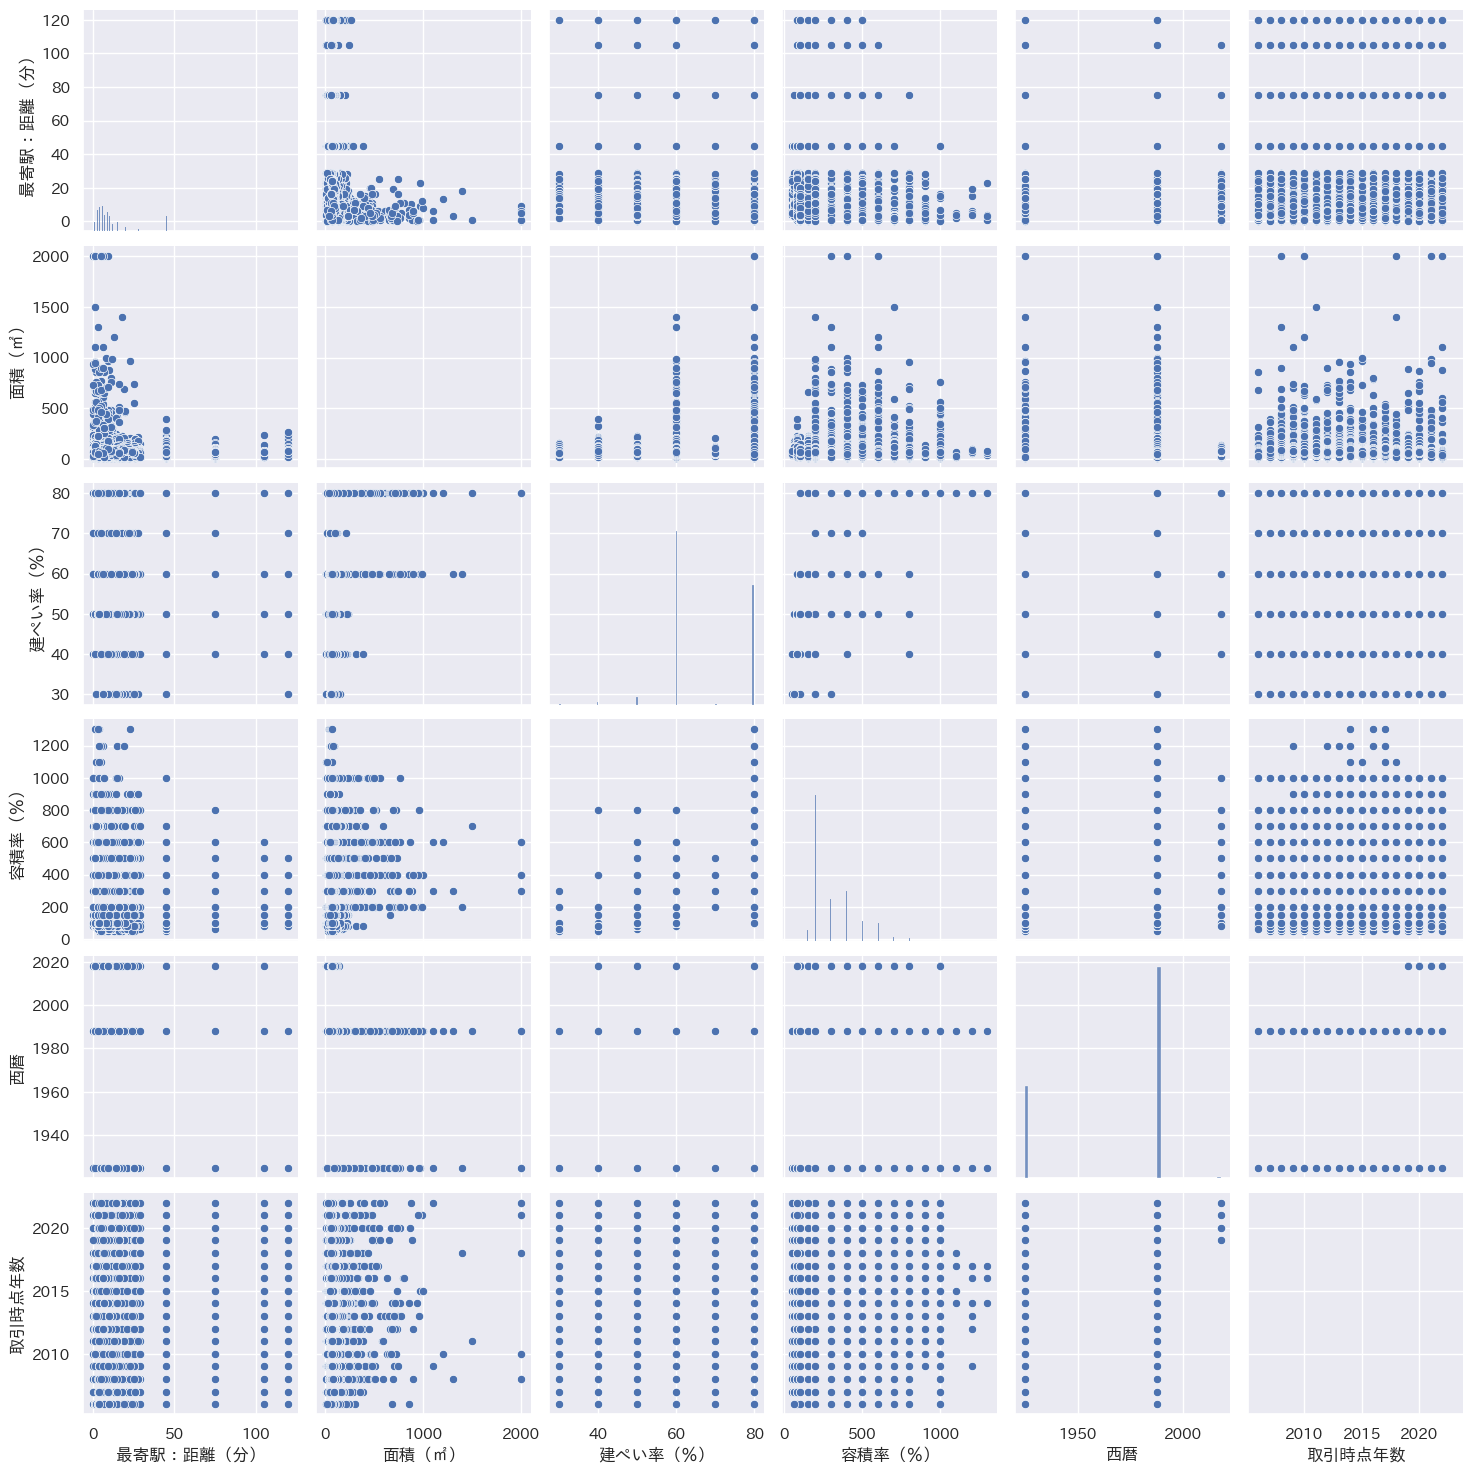

In [54]:
import seaborn as sns
import japanize_matplotlib
import matplotlib.pyplot as plt
# sns.set(font='Hiragino Sans')zz
sns.pairplot(df_dummy[['最寄駅：距離（分）', '面積（㎡）', '建ぺい率（％）','容積率（％）','西暦','取引時点年数',]])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_dummy, df_test, test_size=0.4, random_state=41)

In [34]:
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge,Lasso
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
import xgboost as xgb
import numpy as np
xgb_r = xgb.XGBRegressor(objective='reg:linear',
                          n_estimators=400,
                          max_depth=10,
#                           gamma=5,
                          seed=123)


pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor',xgb_r)
])
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_train)
# y_trueは実際の値、y_predは予測値
mse = mean_squared_error(y_train, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
y_pred = pipe.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae=mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
print(mae)

[18:58:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-07593ffd91cd9da33-1\xgboost\xgboost-ci-windows\src\objective\regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.
RMSE: 0.07947634287705554
RMSE: 0.14219307022798827
0.0906393427659097


In [341]:
coefficients = pipe.named_steps['regressor'].coef_
# 各特徴量の係数を出力
for i, col_name in enumerate(X_train.columns):
    print(f"{col_name}: {coefficients[i]}")

最寄駅：距離（分）: -0.04338332392128202
面積（㎡）: 0.18655945712757627
建ぺい率（％）: 0.004505319862563655
容積率（％）: 0.013556188273467381
西暦: 0.12546276587072766
取引時点年数: 0.032738495025407155
都道府県名_京都府: 0.007284131538176119
都道府県名_佐賀県: -0.0027136124088073072
都道府県名_兵庫県: 0.0029022794289170167
都道府県名_北海道: -0.016439496816976432
都道府県名_千葉県: 0.0031907672203296622
都道府県名_和歌山県: -0.0017568561778935616
都道府県名_埼玉県: 0.007174525823727098
都道府県名_大分県: -0.00596875544556323
都道府県名_大阪府: 0.012833568375795742
都道府県名_奈良県: -0.005866168248927603
都道府県名_宮城県: -0.004256826793084141
都道府県名_宮崎県: -0.003913387437865239
都道府県名_富山県: -0.0022501693060966253
都道府県名_山口県: -0.005146907874218239
都道府県名_山形県: -0.0011999417526250863
都道府県名_山梨県: -0.00323045598329175
都道府県名_岐阜県: -0.002428074997562122
都道府県名_岡山県: -0.0026335578125427327
都道府県名_岩手県: -0.0028112753612409965
都道府県名_島根県: -0.0005860052699178593
都道府県名_広島県: -0.0004517851375876227
都道府県名_徳島県: -0.0027207755588927835
都道府県名_愛媛県: -0.00472168573750529
都道府県名_愛知県: -0.00484874270501453
都道府県名_新潟県: -0.005491847812657172
都

In [342]:
pipe.named_steps

{'scaler': StandardScaler(), 'regressor': Ridge(alpha=0.001)}

In [55]:
df_dummy

,最寄駅：距離（分）,面積（㎡）,建ぺい率（％）,容積率（％）,西暦,取引時点年数,0,1,2,3,4,5,6,7,8
0,5,70,80.0,300.0,1925,2009.0,4.0,338.0,3261.0,38.0,7.0,2786.0,6.0,13.0,0.0
1,45,90,60.0,200.0,1988,2014.0,4.0,340.0,2732.0,48.0,4.0,5209.0,6.0,9.0,0.0
2,29,95,80.0,300.0,1988,2014.0,4.0,338.0,3261.0,48.0,4.0,2779.0,6.0,13.0,0.0
3,45,80,60.0,200.0,1988,2013.0,4.0,344.0,2816.0,48.0,4.0,8108.0,6.0,9.0,1.0
4,45,35,80.0,200.0,1988,2009.0,4.0,344.0,2816.0,11.0,4.0,8107.0,6.0,13.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564688,5,65,80.0,400.0,1988,2020.0,28.0,555.0,1940.0,26.0,4.0,6847.0,6.0,0.0,1.0
564689,6,60,60.0,200.0,1988,2016.0,28.0,555.0,1332.0,26.0,4.0,4384.0,6.0,9.0,0.0
564690,16,60,60.0,200.0,1988,2019.0,28.0,555.0,913.0,26.0,4.0,11067.0,6.0,10.0,1.0
564691,24,70,60.0,200.0,1988,2013.0,28.0,555.0,1433.0,38.0,4.0,4834.0,6.0,7.0,1.0
